# Análisis de datos de actividad cerebral

Equipo:
*   Alejandra Velasco Zárate A01635453
*   Laura Merarí Valdivia Frausto A01641790
*   Francisco Javier Ochoa Chávez A01641644

In [11]:
#Librerías
import numpy as np

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.model_selection import cross_val_score, LeaveOneOut, RepeatedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif, SequentialFeatureSelector, RFE
from sklearn.model_selection import train_test_split
from prettytable import PrettyTable
from sklearn.neural_network import MLPClassifier
from imblearn.under_sampling import RandomUnderSampler

import matplotlib.pyplot as plt
import matplotlib.cm as cm

import pandas as pd

## Evaluación de algoritmos de clasificación

In [12]:
# Funciones de clasificadores
# k-fold SVM cross-validation
def SVM_cross_validation(x,y,n,tipo,a, c):
  n_folds = n
  kf = StratifiedKFold(n_splits=n_folds, shuffle = True)

  acc = 0
  recall = np.array([0., 0., 0.])
  precision = np.array([0., 0., 0.])

  cv_y_test = []
  cv_y_pred = []

  for train_index, test_index in kf.split(x, y):

      # Training phase
      x_train = x[train_index, :]
      y_train = y[train_index]

      clf_cv = SVC(C = c, kernel = tipo)
      clf_cv.fit(x_train, y_train)

      # Test phase
      x_test = x[test_index, :]
      y_test = y[test_index]
      y_pred = clf_cv.predict(x_test)

      # Concatenate results of evaluation
      cv_y_test.append(y_test)
      cv_y_pred.append(y_pred)

      # Model performance
      if a == True:
        print(classification_report(y_test, y_pred))

  # Model performance
  print("Resultados del clasificador:\n\n")
  # Crea la tabla
  report = classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred), output_dict=True)
  accuracy = report['accuracy']
  table = PrettyTable()
  table.field_names = ['Clase', 'Precisión', 'Recall', 'Puntaje F1', 'Soporte']

  # Agrega las filas a la tabla
  for class_label, metrics in report.items():
      if class_label != 'accuracy':
          precision = metrics['precision']
          recall = metrics['recall']
          f1_score = metrics['f1-score']
          support = metrics['support']
          table.add_row([class_label, precision, recall, f1_score, support])

  # Imprime el resultado
  print(table)
  print("\nAccuracy = ", accuracy)

  # k-fold KNN cross-validation
def KNN_cross_validation(x,y,n,k, a):
  n_folds = n
  kf = StratifiedKFold(n_splits=n_folds, shuffle = True)

  acc = 0
  recall = np.array([0., 0., 0.])
  precision = np.array([0., 0., 0.])

  knn_y_test = []
  knn_y_pred = []

  for train_index, test_index in kf.split(x, y):

      # Training phase
      x_train = x[train_index, :]
      y_train = y[train_index]

      knn = KNeighborsClassifier(n_neighbors = int(k))
      knn.fit(x_train, y_train)

      # Test phase
      x_test = x[test_index, :]
      y_test = y[test_index]
      y_pred = knn.predict(x_test)

      # Concatenate results of evaluation
      knn_y_test.append(y_test)
      knn_y_pred.append(y_pred)

      # Model performance
      if a==True:
        print(classification_report(y_test, y_pred))

  # Model performance
  print("Resultados del clasificador:\n\n")
  # Crea la tabla
  report = classification_report(np.concatenate(knn_y_test), np.concatenate(knn_y_pred), output_dict=True)
  accuracy = report['accuracy']
  table = PrettyTable()
  table.field_names = ['Clase', 'Precisión', 'Recall', 'Puntaje F1', 'Soporte']

  # Agrega las filas a la tabla
  for class_label, metrics in report.items():
      if class_label != 'accuracy':
          precision = metrics['precision']
          recall = metrics['recall']
          f1_score = metrics['f1-score']
          support = metrics['support']
          table.add_row([class_label, precision, recall, f1_score, support])

  # Imprime el resultado
  print(table)
  print("\nAccuracy = ", accuracy)

#MLP
def perceptron(x , y, capas):

  clf = MLPClassifier(hidden_layer_sizes=capas, max_iter=10000)  # hidden_layer_sizes controls the number of neurons of each hidden layer.
  clf.fit(x, y)


  # 5-fold cross-validation
  kf = StratifiedKFold(n_splits=5, shuffle = True)

  cv_y_test = []
  cv_y_pred = []

  for train_index, test_index in kf.split(x, y):

      # Training phase
      x_train = x[train_index, :]
      y_train = y[train_index]

      clf_i = MLPClassifier(hidden_layer_sizes=capas, max_iter=10000)
      clf_i.fit(x_train, y_train)

      # Test phase
      x_test = x[test_index, :]
      y_test = y[test_index]
      y_pred = clf_i.predict(x_test)

      cv_y_test.append(y_test)
      cv_y_pred.append(y_pred)

      print(classification_report(y_test, y_pred))

  # Model performance
  print("Resultados del clasificador:\n\n")
  # Crea la tabla
  report = classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred), output_dict=True)
  accuracy = accuracy_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred))

  # Crea la tabla
  table = PrettyTable()
  table.field_names = ['Clase', 'Precisión', 'Recall', 'Puntaje F1', 'Soporte']

  # Agrega las filas a la tabla
  for class_label, metrics in report.items():
      if class_label != 'accuracy':
          precision = metrics['precision']
          recall = metrics['recall']
          f1_score = metrics['f1-score']
          support = metrics['support']
          table.add_row([class_label, precision, recall, f1_score, support])

  # Agrega la fila de accuracy a la tabla
  table.add_row(['Accuracy', '', '', accuracy, ''])

  # Imprime el resultado
  print(table)

# k-fold Decisión Tree cross-validation
def dtc_cross_validation(x,y,n,a, criterio):
  n_folds = n
  kf = StratifiedKFold(n_splits=n_folds, shuffle = True)

  acc = 0
  recall = np.array([0., 0., 0.])
  precision = np.array([0., 0., 0.])

  dtc_y_test = []
  dtc_y_pred = []

  for train_index, test_index in kf.split(x, y):

      # Training phase
      x_train = x[train_index, :]
      y_train = y[train_index]

      dtc = DecisionTreeClassifier(criterion=criterio)
      dtc.fit(x_train, y_train)

      # Test phase
      x_test = x[test_index, :]
      y_test = y[test_index]
      y_pred = dtc.predict(x_test)

      # Concatenate results of evaluation
      dtc_y_test.append(y_test)
      dtc_y_pred.append(y_pred)

      # Model performance
      if a == True:
        print(classification_report(y_test, y_pred))

  # Model performance
  print("Resultados del clasificador:\n\n")
  # Crea la tabla
  report = classification_report(np.concatenate(dtc_y_test), np.concatenate(dtc_y_pred), output_dict=True)
  accuracy = report['accuracy']
  table = PrettyTable()
  table.field_names = ['Clase', 'Precisión', 'Recall', 'Puntaje F1', 'Soporte']

  # Agrega las filas a la tabla
  for class_label, metrics in report.items():
      if class_label != 'accuracy':
          precision = metrics['precision']
          recall = metrics['recall']
          f1_score = metrics['f1-score']
          support = metrics['support']
          table.add_row([class_label, precision, recall, f1_score, support])


  # Imprime el resultado
  print(table)
  print("\nAccuracy = ", accuracy)

# k-fold XGB cross-validation
def XGB_cross_validation(x,y,n, a, boost):
  n_folds = n
  kf = StratifiedKFold(n_splits=n_folds, shuffle = True)

  acc = 0
  recall = np.array([0., 0., 0.])
  precision = np.array([0., 0., 0.])

  xgb_y_test = []
  xgb_y_pred = []

  for train_index, test_index in kf.split(x, y):

      # Training phase
      x_train = x[train_index, :]
      y_train = y[train_index] - 1

      xgb = XGBClassifier(booster = boost)
      xgb.fit(x_train,y_train)

      # Test phase
      x_test = x[test_index, :]
      y_test = y[test_index]
      y_pred = xgb.predict(x_test) + 1

      # Concatenate results of evaluation
      xgb_y_test.append(y_test)
      xgb_y_pred.append(y_pred)

      # Model performance
      if a == True:
        print(classification_report(y_test, y_pred))

  # Model performance
  print("Resultados del clasificador:\n\n")
  # Crea la tabla
  report = classification_report(np.concatenate(xgb_y_test), np.concatenate(xgb_y_pred), output_dict=True)
  accuracy = report['accuracy']
  table = PrettyTable()
  table.field_names = ['Clase', 'Precisión', 'Recall', 'Puntaje F1', 'Soporte']

  # Agrega las filas a la tabla
  for class_label, metrics in report.items():
      if class_label != 'accuracy':
          precision = metrics['precision']
          recall = metrics['recall']
          f1_score = metrics['f1-score']
          support = metrics['support']
          table.add_row([class_label, precision, recall, f1_score, support])

  # Imprime el resultado
  print(table)
  print("\nAccuracy = ", accuracy)

### P300: Datos Laura

1. Evalúe el rendimiento de los modelos de clasificación SVM, K-NN, y MLP (de al menos 2 capas). Calcule tanto la exactitud, la precisión por clase y el recall por clase para cada uno de los modelos.

In [ ]:
lauraP300 = pd.read_csv("/Features_Laura_P300.txt", header=None, delimiter="\t")
lauraP300 = lauraP300.drop([155], axis=1)
lauraP300 = lauraP300[lauraP300[1] != 0]
lauraP300.head()

,0,1,2,3,4,5,6,7,8,9,...,145,146,147,148,149,150,151,152,153,154
0,1,1,3.094699,2.686294,2.116933,1.681730,1.428804,1.146389,0.697691,0.163320,...,-0.390041,-1.289870,-1.585485,-0.967814,-0.326333,-0.394560,-0.848664,-1.019911,-0.902654,-0.982901
1,1,1,-1.647285,-1.337426,-0.399274,0.617037,1.403505,1.960633,2.237125,2.095777,...,1.075409,1.152623,0.494895,-0.655006,-1.339643,-1.267109,-1.180082,-1.703452,-2.400101,-2.382245
2,1,1,-0.897142,-0.418778,0.313001,0.458591,0.068793,-0.079836,0.346122,0.826408,...,-0.924741,-0.738733,-0.511247,-0.246012,-0.063970,-0.031393,0.016903,0.278268,0.691305,1.000935
3,1,1,0.342521,0.344052,0.433977,0.741706,1.032663,1.004040,0.807921,0.958655,...,-0.096683,-0.061644,-0.097367,-0.062478,0.083558,0.223636,0.260519,0.283433,0.427372,0.567981
4,1,1,1.266527,0.976373,0.392510,-0.398334,-0.912957,-0.836680,-0.621592,-0.958110,...,-0.483651,-0.102319,0.579976,0.821032,0.434634,0.054592,0.211030,0.627942,0.709177,0.276425


In [ ]:
x = lauraP300.iloc[:, 2:].values
y = lauraP300.iloc[:, 0].values

clase2=0
clase3=0

for i in y:
  if i==1:
    clase2+=1
  elif i == 2:
    clase3+=1

print(f"\nLa clase 1 tiene {clase2} observaciones")
print(f"\nLa clase 2 tiene {clase3} observaciones")


La clase 1 tiene 262 observaciones

La clase 2 tiene 1042 observaciones


Al realizar un análisis exploratorio de los datos se puede observar que hay un desbalance entre las clases 1 y 2, ya que la clase 2 tiene casi 4 veces más observaciones que la clase uno. Si no balanceamos los datos, el recall, precisión y F1-Score de la clase 1 será muy bajo, mientras que la clase 2 tendrá valores aceptables.

In [ ]:
rus = RandomUnderSampler(sampling_strategy="majority")
xL, yL = rus.fit_resample(x, y)

In [ ]:
clase2=0
clase3=0

for i in yL:
  if i==1:
    clase2+=1
  elif i == 2:
    clase3+=1

print(f"\nLa clase 1 tiene {clase2} observaciones")
print(f"\nLa clase 2 tiene {clase3} observaciones")


La clase 1 tiene 262 observaciones

La clase 2 tiene 262 observaciones


Al balancear los datos, podemos sacrificar un poco el accuracy de los modelos de clasificación ya que se hace una disminución en las observaciones, pero mejora los evaluadores de la clase 1.

SVM

In [ ]:
SVM_cross_validation(xL,yL,5,"rbf",True, 1)

              precision    recall  f1-score   support

           1       0.80      0.83      0.81        53
           2       0.82      0.79      0.80        52

    accuracy                           0.81       105
   macro avg       0.81      0.81      0.81       105
weighted avg       0.81      0.81      0.81       105

              precision    recall  f1-score   support

           1       0.92      0.85      0.88        53
           2       0.86      0.92      0.89        52

    accuracy                           0.89       105
   macro avg       0.89      0.89      0.89       105
weighted avg       0.89      0.89      0.89       105

              precision    recall  f1-score   support

           1       0.74      0.71      0.73        52
           2       0.73      0.75      0.74        53

    accuracy                           0.73       105
   macro avg       0.73      0.73      0.73       105
weighted avg       0.73      0.73      0.73       105

              preci

KNN

k = 13

In [ ]:
KNN_cross_validation(xL,yL,5,13,True)

              precision    recall  f1-score   support

           1       0.76      0.70      0.73        53
           2       0.71      0.77      0.74        52

    accuracy                           0.73       105
   macro avg       0.73      0.73      0.73       105
weighted avg       0.73      0.73      0.73       105

              precision    recall  f1-score   support

           1       0.81      0.72      0.76        53
           2       0.74      0.83      0.78        52

    accuracy                           0.77       105
   macro avg       0.77      0.77      0.77       105
weighted avg       0.78      0.77      0.77       105

              precision    recall  f1-score   support

           1       0.73      0.67      0.70        52
           2       0.70      0.75      0.73        53

    accuracy                           0.71       105
   macro avg       0.72      0.71      0.71       105
weighted avg       0.72      0.71      0.71       105

              preci

MLP
5 capas

In [ ]:
import warnings
warnings.filterwarnings("ignore")

perceptron(xL,yL,(5,5,5,5,5))

              precision    recall  f1-score   support

           1       0.78      0.79      0.79        53
           2       0.78      0.77      0.78        52

    accuracy                           0.78       105
   macro avg       0.78      0.78      0.78       105
weighted avg       0.78      0.78      0.78       105

              precision    recall  f1-score   support

           1       0.78      0.60      0.68        53
           2       0.67      0.83      0.74        52

    accuracy                           0.71       105
   macro avg       0.73      0.72      0.71       105
weighted avg       0.73      0.71      0.71       105

              precision    recall  f1-score   support

           1       0.64      0.73      0.68        52
           2       0.70      0.60      0.65        53

    accuracy                           0.67       105
   macro avg       0.67      0.67      0.67       105
weighted avg       0.67      0.67      0.67       105

              preci

El mejor clasificador es SVM

2. Seleccione dos modelos de clasificación no vistos en clase, y evalúelos con sus conjuntos de datos. Calcule tanto la exactitud, la precisión por clase y el recall por clase para cada uno de los modelos.

Decision Tree Classifier

In [ ]:
dtc_cross_validation(xL,yL,5, True, 'gini')

              precision    recall  f1-score   support

           1       0.63      0.62      0.63        53
           2       0.62      0.63      0.63        52

    accuracy                           0.63       105
   macro avg       0.63      0.63      0.63       105
weighted avg       0.63      0.63      0.63       105

              precision    recall  f1-score   support

           1       0.62      0.62      0.62        53
           2       0.62      0.62      0.62        52

    accuracy                           0.62       105
   macro avg       0.62      0.62      0.62       105
weighted avg       0.62      0.62      0.62       105

              precision    recall  f1-score   support

           1       0.67      0.65      0.66        52
           2       0.67      0.68      0.67        53

    accuracy                           0.67       105
   macro avg       0.67      0.67      0.67       105
weighted avg       0.67      0.67      0.67       105

              preci

XGBoost Classifier

In [ ]:
XGB_cross_validation(xL,yL,5, True, 'gbtree')

              precision    recall  f1-score   support

           1       0.76      0.79      0.78        53
           2       0.78      0.75      0.76        52

    accuracy                           0.77       105
   macro avg       0.77      0.77      0.77       105
weighted avg       0.77      0.77      0.77       105

              precision    recall  f1-score   support

           1       0.76      0.72      0.74        53
           2       0.73      0.77      0.75        52

    accuracy                           0.74       105
   macro avg       0.74      0.74      0.74       105
weighted avg       0.74      0.74      0.74       105

              precision    recall  f1-score   support

           1       0.75      0.75      0.75        52
           2       0.75      0.75      0.75        53

    accuracy                           0.75       105
   macro avg       0.75      0.75      0.75       105
weighted avg       0.75      0.75      0.75       105

              preci

Mejor modelo:SVM

3. Indique qué modelos de clasificación de los que evaluó anteriormente tienen hiperparámetros y cuáles son éstos en cada caso. Seleccione uno de estos clasificadores, y determine sus hiperparámetros óptimos.

1.   ***SVM***
  *   **C**: Es el parámetro que controla la relación el tamaño del margen (valor grande de 𝐶 ocasiona un margen pequeño, y un valor grande de 𝐶 conduce a un margen grande).
2.   ***KNN***
  *   **k**: Representa el número de vecinos más cercanos que se utilizan para la clasificación. Seleccionar un valor adecuado para k es importante, ya que un valor bajo puede llevar a un modelo demasiado sensible al ruido y un valor alto puede llevar a un modelo demasiado generalizado.
3.   ***MLP***
  *   **hidden_layer_sizes**: Especifica la arquitectura de la red neuronal, es decir, el número de neuronas en cada capa oculta.
4.   ***Decision Tree Classifier***
  *   **max_depth**: Determina la profundidad máxima del árbol de decisión.
  *   **criterion**: Es el encargado de medir la uniformidad de los nodos, uniformidad quiere decir que las cosas que son similares deben estar juntas y las que son diferentes deben separarse y distinguirse claramente unas de otras. se puede elegir el mse/mae/friedman_mse para regresión y gini/entropy para clasificación.
  *   **min_samples_split**: el número mínimo de datos requeridos por un nodo para realizar una división.
5.   ***XGBoost Classifier***
  *   **n_estimators**: Representa el número de árboles que se utilizarán en el modelo. Cuanto mayor sea este valor, más complejo será el modelo y más tiempo requerirá el entrenamiento. Sin embargo, un número demasiado alto puede llevar a un sobreajuste.
  *   **booster**: El tipo de modelo de clasificación usado, por defecto gbtree.
  *   **max_depth**: “Profundidad” o número de nodos de bifurcación de los árboles de decisión usados en el entrenamiento.

Hiperparámetro KNN

In [ ]:
for k in range(10, 20):
  print(f'\nPara k = {k} los resultados son: ')
  KNN_cross_validation(xL,yL,5,k,False)


Para k = 10 los resultados son: 
Resultados del clasificador:


+--------------+--------------------+--------------------+--------------------+---------+
|    Clase     |     Precisión      |       Recall       |     Puntaje F1     | Soporte |
+--------------+--------------------+--------------------+--------------------+---------+
|      1       | 0.6529968454258676 | 0.7900763358778626 | 0.7150259067357513 |   262   |
|      2       | 0.7342995169082126 | 0.5801526717557252 | 0.6481876332622601 |   262   |
|  macro avg   | 0.6936481811670401 | 0.6851145038167938 | 0.6816067699990057 |   524   |
| weighted avg | 0.6936481811670401 | 0.6851145038167938 | 0.6816067699990056 |   524   |
+--------------+--------------------+--------------------+--------------------+---------+

Accuracy =  0.6851145038167938

Para k = 11 los resultados son: 
Resultados del clasificador:


+--------------+--------------------+--------------------+--------------------+---------+
|    Clase     |     Precisi

Mejor k=16 para mayor exactitud, recall y precisión

4. Para uno de los modelos de clasificación, aplique un método de selección de características. Indique cuantas características son suficientes para obtener buenos resultados.

--------------- Wrapper feature selection, k = 1
ACC:  0.6412213740458015 Recall:  [0.60305344 0.67938931] Precision:  [0.65289256 0.63120567]
--------------- Wrapper feature selection, k = 2
ACC:  0.6984732824427481 Recall:  [0.69083969 0.70610687] Precision:  [0.70155039 0.69548872]
--------------- Wrapper feature selection, k = 3
ACC:  0.7080152671755725 Recall:  [0.70610687 0.70992366] Precision:  [0.70881226 0.70722433]
--------------- Wrapper feature selection, k = 4
ACC:  0.7041984732824428 Recall:  [0.70229008 0.70610687] Precision:  [0.70498084 0.70342205]
--------------- Wrapper feature selection, k = 5
ACC:  0.6736641221374046 Recall:  [0.66030534 0.6870229 ] Precision:  [0.67843137 0.66914498]
--------------- Wrapper feature selection, k = 6
ACC:  0.7137404580152672 Recall:  [0.6870229  0.74045802] Precision:  [0.72580645 0.70289855]
--------------- Wrapper feature selection, k = 7
ACC:  0.7232824427480916 Recall:  [0.7519084  0.69465649] Precision:  [0.71119134 0.73684211]

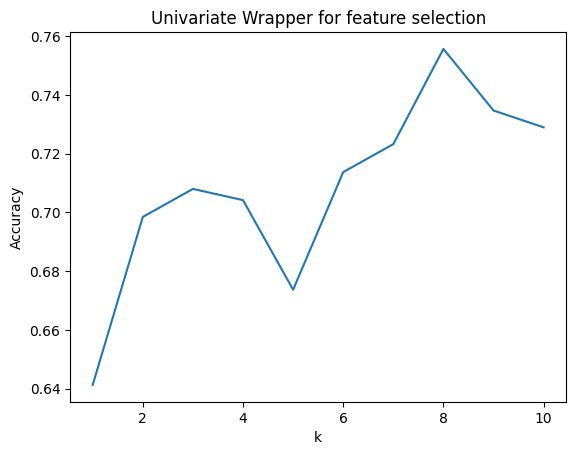

In [ ]:
# Use the wrapper approach for feature selection
ks = np.arange(1, 11, 1)
accs = []
clf = SVC(kernel = 'rbf')
kf = StratifiedKFold(n_splits=5, shuffle = True)


for k in ks:
    print('--------------- Wrapper feature selection, k =', k)

    cv_y_test = []
    cv_y_pred = []

    for train_index, test_index in kf.split(xL, yL):

       # Training phase
        x_train = xL[train_index, :]
        y_train = yL[train_index]

        knn = KNeighborsClassifier(n_neighbors=k)

        ffs = SequentialFeatureSelector(knn, n_features_to_select=k)
        ffs.fit(x_train, y_train)
        x_train = ffs.transform(x_train)

        clf.fit(x_train, y_train)

        # Test phase
        x_test = ffs.transform(xL[test_index, :])
        y_test = yL[test_index]
        y_pred = clf.predict(x_test)

        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)

    acc = accuracy_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred))
    rec = recall_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred), average = None)
    pre = precision_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred), average = None)

    print('ACC: ', acc, 'Recall: ', rec, 'Precision: ', pre)
    accs.append(acc)

plt.plot(ks, accs)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Univariate Wrapper for feature selection')
plt.show()

Se puede observar que con 8 características se tiene un mejor accuracy y una mejor precicisón y recall por clase.

### P300: Datos Frank

1. Evalúe el rendimiento de los modelos de clasificación SVM, K-NN, y MLP (de al menos 2 capas). Calcule tanto la exactitud, la precisión por clase y el recall por clase para cada uno de los modelos.

In [ ]:
frankP300 = pd.read_csv("/content/drive/Shareddrives/Proyecto_AprendizajeAI/Features_Frank_P300_2.txt", header=None, delimiter="\t")
frankP300 = frankP300.drop([152], axis=1)
frankP300 = frankP300[frankP300[1] != 0]
frankP300.head()

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,149,150,151
0,1,1,-0.650851,-1.103353,-1.011505,-0.806631,-0.929389,-1.399728,-1.890547,-2.008128,...,1.019730,0.925757,0.178875,-0.613055,-0.695333,-0.185439,0.051071,-0.407607,-0.971513,-0.900166
1,1,1,0.430508,-0.367755,-0.438024,-0.058692,-0.151503,-0.875360,-1.326114,-0.877437,...,1.154726,0.584666,0.327648,0.666186,1.234882,1.276373,0.534872,-0.241118,-0.090552,0.922864
2,1,1,-0.764953,-0.304019,0.290725,0.773008,1.368661,1.910477,1.791856,0.970698,...,-0.666665,-1.050586,-1.035848,-0.656030,-0.560080,-0.955270,-1.206095,-0.794955,-0.076633,0.337063
3,1,1,-0.320071,-0.561524,-0.814992,-1.033411,-1.067577,-0.813750,-0.399316,-0.123247,...,-1.242755,-0.985276,-1.595225,-2.324547,-2.021589,-0.901173,-0.299647,-0.759278,-1.319188,-1.036059
4,1,1,-0.239852,0.406552,2.006212,3.284820,3.240865,2.238398,1.273309,0.675379,...,0.858562,1.203783,0.967443,0.884985,1.165211,1.160697,0.576841,0.084106,0.197770,0.367902


In [ ]:
xF = frankP300.iloc[:, 1:].values
yF = frankP300.iloc[:, 0].values

clase2=0
clase3=0

for i in yF:
  if i==1:
    clase2+=1
  elif i == 2:
    clase3+=1

print(f"\nLa clase 1 tiene {clase2} observaciones")
print(f"\nLa clase 2 tiene {clase3} observaciones")


La clase 1 tiene 277 observaciones

La clase 2 tiene 1116 observaciones


En este caso se tiene el mismo problema que en la base de datos anterior, razón por la cual se balancearon los datos.

In [ ]:
rus = RandomUnderSampler(sampling_strategy="majority")
xF, yF = rus.fit_resample(xF, yF)


In [ ]:
clase2=0
clase3=0

for i in yF:
  if i==1:
    clase2+=1
  elif i == 2:
    clase3+=1

print(f"\nLa clase 1 tiene {clase2} observaciones")
print(f"\nLa clase 2 tiene {clase3} observaciones")


La clase 1 tiene 277 observaciones

La clase 2 tiene 277 observaciones


Al final reducimos los datos de la clase 2, de 1116 a 277.

SVM

In [ ]:
SVM_cross_validation(xF,yF,5,"rbf", True, 1)

              precision    recall  f1-score   support

           1       0.79      0.79      0.79        56
           2       0.78      0.78      0.78        55

    accuracy                           0.78       111
   macro avg       0.78      0.78      0.78       111
weighted avg       0.78      0.78      0.78       111

              precision    recall  f1-score   support

           1       0.78      0.77      0.77        56
           2       0.77      0.78      0.77        55

    accuracy                           0.77       111
   macro avg       0.77      0.77      0.77       111
weighted avg       0.77      0.77      0.77       111

              precision    recall  f1-score   support

           1       0.76      0.75      0.75        55
           2       0.75      0.77      0.76        56

    accuracy                           0.76       111
   macro avg       0.76      0.76      0.76       111
weighted avg       0.76      0.76      0.76       111

              preci

KNN

In [ ]:
KNN_cross_validation(xF,yF,5,13,True)

              precision    recall  f1-score   support

           1       0.73      0.82      0.77        56
           2       0.79      0.69      0.74        55

    accuracy                           0.76       111
   macro avg       0.76      0.76      0.76       111
weighted avg       0.76      0.76      0.76       111

              precision    recall  f1-score   support

           1       0.63      0.77      0.69        56
           2       0.70      0.55      0.61        55

    accuracy                           0.66       111
   macro avg       0.67      0.66      0.65       111
weighted avg       0.66      0.66      0.65       111

              precision    recall  f1-score   support

           1       0.70      0.67      0.69        55
           2       0.69      0.71      0.70        56

    accuracy                           0.69       111
   macro avg       0.69      0.69      0.69       111
weighted avg       0.69      0.69      0.69       111

              preci

MLP

In [ ]:
import warnings
warnings.filterwarnings("ignore")

perceptron(xF,yF,(5,5,5,5,5))

              precision    recall  f1-score   support

           1       0.73      0.79      0.76        56
           2       0.76      0.71      0.74        55

    accuracy                           0.75       111
   macro avg       0.75      0.75      0.75       111
weighted avg       0.75      0.75      0.75       111

              precision    recall  f1-score   support

           1       0.74      0.62      0.68        56
           2       0.67      0.78      0.72        55

    accuracy                           0.70       111
   macro avg       0.71      0.70      0.70       111
weighted avg       0.71      0.70      0.70       111

              precision    recall  f1-score   support

           1       0.66      0.85      0.75        55
           2       0.80      0.57      0.67        56

    accuracy                           0.71       111
   macro avg       0.73      0.71      0.71       111
weighted avg       0.73      0.71      0.71       111

              preci

2. Seleccione dos modelos de clasificación no vistos en clase, y evalúelos con sus conjuntos de datos. Calcule tanto la exactitud, la precisión por clase y el recall por clase para cada uno de los modelos.

Decision Tree Classifier

In [ ]:
dtc_cross_validation(xF,yF,5, True, 'gini')

              precision    recall  f1-score   support

           1       0.59      0.70      0.64        56
           2       0.62      0.51      0.56        55

    accuracy                           0.60       111
   macro avg       0.61      0.60      0.60       111
weighted avg       0.61      0.60      0.60       111

              precision    recall  f1-score   support

           1       0.64      0.61      0.62        56
           2       0.62      0.65      0.64        55

    accuracy                           0.63       111
   macro avg       0.63      0.63      0.63       111
weighted avg       0.63      0.63      0.63       111

              precision    recall  f1-score   support

           1       0.66      0.60      0.63        55
           2       0.64      0.70      0.67        56

    accuracy                           0.65       111
   macro avg       0.65      0.65      0.65       111
weighted avg       0.65      0.65      0.65       111

              preci

XGBoost classifier

In [ ]:
XGB_cross_validation(xF,yF,5, True, 'gbtree')

              precision    recall  f1-score   support

           1       0.72      0.73      0.73        56
           2       0.72      0.71      0.72        55

    accuracy                           0.72       111
   macro avg       0.72      0.72      0.72       111
weighted avg       0.72      0.72      0.72       111

              precision    recall  f1-score   support

           1       0.70      0.77      0.74        56
           2       0.74      0.67      0.70        55

    accuracy                           0.72       111
   macro avg       0.72      0.72      0.72       111
weighted avg       0.72      0.72      0.72       111

              precision    recall  f1-score   support

           1       0.77      0.73      0.75        55
           2       0.75      0.79      0.77        56

    accuracy                           0.76       111
   macro avg       0.76      0.76      0.76       111
weighted avg       0.76      0.76      0.76       111

              preci

El mejor clasificador de los 5 evaluados fue SVM.

3. Indique qué modelos de clasificación de los que evaluó anteriormente tienen hiperparámetros y cuáles son éstos en cada caso. Seleccione uno de estos clasificadores, y determine sus hiperparámetros óptimos.

1.   ***SVM***
  *   **C**: Es el parámetro que controla la relación el tamaño del margen (valor grande de 𝐶 ocasiona un margen pequeño, y un valor grande de 𝐶 conduce a un margen grande).
2.   ***KNN***
  *   **k**: Representa el número de vecinos más cercanos que se utilizan para la clasificación. Seleccionar un valor adecuado para k es importante, ya que un valor bajo puede llevar a un modelo demasiado sensible al ruido y un valor alto puede llevar a un modelo demasiado generalizado.
3.   ***MLP***
  *   **hidden_layer_sizes**: Especifica la arquitectura de la red neuronal, es decir, el número de neuronas en cada capa oculta.
4.   ***Decision Tree Classifier***
  *   **max_depth**: Determina la profundidad máxima del árbol de decisión.
  *   **criterion**: Es el encargado de medir la uniformidad de los nodos, uniformidad quiere decir que las cosas que son similares deben estar juntas y las que son diferentes deben separarse y distinguirse claramente unas de otras. se puede elegir el mse/mae/friedman_mse para regresión y gini/entropy para clasificación.
  *   **min_samples_split**: el número mínimo de datos requeridos por un nodo para realizar una división.
5.   ***XGBoost Classifier***
  *   **n_estimators**: Representa el número de árboles que se utilizarán en el modelo. Cuanto mayor sea este valor, más complejo será el modelo y más tiempo requerirá el entrenamiento. Sin embargo, un número demasiado alto puede llevar a un sobreajuste.
  *   **booster**: El tipo de modelo de clasificación usado, por defecto gbtree.
  *   **max_depth**: “Profundidad” o número de nodos de bifurcación de los árboles de decisión usados en el entrenamiento.

Hiperparámetro Decision Tree

In [ ]:
criterio = ['gini', 'entropy', 'log_loss']

for i in criterio:
  print(f"\nPara criterion: {i}:")
  dtc_cross_validation(xF,yF,5, False, i)


Para criterion: gini:
Resultados del clasificador:


+--------------+--------------------+--------------------+--------------------+---------+
|    Clase     |     Precisión      |       Recall       |     Puntaje F1     | Soporte |
+--------------+--------------------+--------------------+--------------------+---------+
|      1       | 0.629757785467128  | 0.6570397111913358 | 0.6431095406360424 |   277   |
|      2       | 0.6415094339622641 | 0.6137184115523465 | 0.6273062730627307 |   277   |
|  macro avg   | 0.6356336097146961 | 0.6353790613718411 | 0.6352079068493865 |   554   |
| weighted avg | 0.6356336097146961 | 0.6353790613718412 | 0.6352079068493865 |   554   |
+--------------+--------------------+--------------------+--------------------+---------+

Accuracy =  0.6353790613718412

Para criterion: entropy:
Resultados del clasificador:


+--------------+--------------------+--------------------+--------------------+---------+
|    Clase     |     Precisión      |       Rec

El mejor hiperparámetro del clasificador de Árbol de decisión criterio es 'log_loss'.

4. Para uno de los modelos de clasificación, aplique un método de selección de características. Indique cuantas características son suficientes para obtener buenos resultados.

In [ ]:
# Use the wrapper approach for feature selection
ks = np.arange(1, 11, 1)
accs = []
clf = SVC(kernel = 'rbf')
kf = StratifiedKFold(n_splits=5, shuffle = True)


for k in ks:
    print('--------------- Wrapper feature selection, k =', k)

    cv_y_test = []
    cv_y_pred = []

    for train_index, test_index in kf.split(xF, yF):

       # Training phase
        x_train = xF[train_index, :]
        y_train = yF[train_index]

        knn = KNeighborsClassifier(n_neighbors=k)

        ffs = SequentialFeatureSelector(knn, n_features_to_select=k)
        ffs.fit(x_train, y_train)
        x_train = ffs.transform(x_train)

        clf.fit(x_train, y_train)

        # Test phase
        x_test = ffs.transform(xF[test_index, :])
        y_test = yF[test_index]
        y_pred = clf.predict(x_test)

        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)

    acc = accuracy_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred))
    rec = recall_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred), average = None)
    pre = precision_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred), average = None)

    print('ACC: ', acc, 'Recall: ', rec, 'Precision: ', pre)
    accs.append(acc)

plt.plot(ks, accs)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Univariate Wrapper for feature selection')
plt.show()

--------------- Wrapper feature selection, k = 1
ACC:  0.631768953068592 Recall:  [0.68231047 0.58122744] Precision:  [0.61967213 0.64658635]
--------------- Wrapper feature selection, k = 2
ACC:  0.6263537906137184 Recall:  [0.67509025 0.57761733] Precision:  [0.61513158 0.64      ]
--------------- Wrapper feature selection, k = 3
ACC:  0.6913357400722022 Recall:  [0.67509025 0.70758123] Precision:  [0.69776119 0.68531469]
--------------- Wrapper feature selection, k = 4
ACC:  0.6841155234657039 Recall:  [0.70036101 0.66787004] Precision:  [0.67832168 0.69029851]
--------------- Wrapper feature selection, k = 5


El rendimiento óptimo del modelo se consigue con 9 características.

### Cognitivo Frank


**Clasificación de tareas**

In [8]:
frank_cog= pd.read_csv("/Features_Frank_Cognitivo.txt" , header=None, delimiter= "\t")
frank_cog = frank_cog.dropna(axis=1)
frank_cog = frank_cog[frank_cog[1] != 0]
frank_cog = frank_cog[frank_cog[0] != 13]
frank_cog.head()

,0,1,2,3,4,5,6,7,8,9,...,2332,2333,2334,2335,2336,2337,2338,2339,2340,2341
0,1,1,-1.316079,-0.569181,-0.840397,-2.263029,-0.477150,-0.473358,-1.639392,-0.018691,...,-1.089592,-1.521619,-0.756561,-1.132632,-1.944529,-1.126415,-1.040056,-1.276589,-1.252492,-1.276102
1,1,1,-0.092858,-0.509809,-0.208803,0.182265,-1.280907,-0.332009,0.088508,-0.322166,...,-1.129138,-1.549519,-1.534214,-0.629425,-1.352853,-0.975112,-1.168972,-2.116018,-1.773718,-1.474069
2,1,1,-0.924355,-1.020561,-0.608800,-1.923035,-1.002875,-0.927044,-0.946278,-0.433741,...,-1.051609,-1.223329,-1.384643,-0.561653,-0.666955,-1.012405,-0.713106,-1.353017,-1.530745,-0.481837
3,1,1,-0.269049,-0.495929,-0.515496,-0.309277,-0.425367,-0.968869,-0.364516,-1.179716,...,-0.825389,-0.510917,-0.676058,-0.091499,-0.740510,-0.497735,-0.659177,-1.753575,-0.644050,-0.541565
4,1,1,0.174988,-0.915864,0.160994,-2.238067,-0.740315,-0.548436,0.227631,-0.112852,...,-0.375743,-1.633402,-1.146866,-0.800723,-0.698990,-0.311886,-1.488918,-1.371906,-1.615953,-0.688520


In [9]:
transformacion = lambda x: 1 if 1 <= x <= 4 else 2 if 5 <= x <= 8 else 3 if 9 <= x <= 12 else 4
frank_cog[0] = frank_cog[0].map(transformacion)
xFC= frank_cog.iloc[:, 2:].values
yFC = frank_cog.iloc[:, 0].values

1. Evalúe el rendimiento de los modelos de clasificación SVM, K-NN, y MLP (de al menos 2 capas). Calcule tanto la exactitud, la precisión por clase y el recall por clase para cada uno de los modelos.

SVM

In [13]:
SVM_cross_validation(xFC,yFC,5,"rbf",True, 1)

              precision    recall  f1-score   support

           1       0.88      0.64      0.74        11
           2       0.91      1.00      0.95        10
           3       0.77      0.91      0.83        11

    accuracy                           0.84        32
   macro avg       0.85      0.85      0.84        32
weighted avg       0.85      0.84      0.84        32

              precision    recall  f1-score   support

           1       1.00      0.82      0.90        11
           2       0.91      1.00      0.95        10
           3       0.91      1.00      0.95        10

    accuracy                           0.94        31
   macro avg       0.94      0.94      0.93        31
weighted avg       0.94      0.94      0.93        31

              precision    recall  f1-score   support

           1       0.75      0.60      0.67        10
           2       0.83      0.91      0.87        11
           3       0.73      0.80      0.76        10

    accuracy        

KNN

k=5

In [ ]:
KNN_cross_validation(xFC,yFC,5,5,True)

              precision    recall  f1-score   support

           1       0.89      0.73      0.80        11
           2       0.83      1.00      0.91        10
           3       0.82      0.82      0.82        11

    accuracy                           0.84        32
   macro avg       0.85      0.85      0.84        32
weighted avg       0.85      0.84      0.84        32

              precision    recall  f1-score   support

           1       1.00      0.55      0.71        11
           2       0.91      1.00      0.95        10
           3       0.71      1.00      0.83        10

    accuracy                           0.84        31
   macro avg       0.87      0.85      0.83        31
weighted avg       0.88      0.84      0.83        31

              precision    recall  f1-score   support

           1       0.88      0.70      0.78        10
           2       1.00      0.91      0.95        11
           3       0.77      1.00      0.87        10

    accuracy        

MLP 5 capas

In [ ]:
import warnings
warnings.filterwarnings("ignore")
perceptron(xFC,yFC,(5,5,5,5,5))

              precision    recall  f1-score   support

           1       0.70      0.64      0.67        11
           2       0.91      1.00      0.95        10
           3       0.73      0.73      0.73        11

    accuracy                           0.78        32
   macro avg       0.78      0.79      0.78        32
weighted avg       0.77      0.78      0.78        32

              precision    recall  f1-score   support

           1       0.89      0.73      0.80        11
           2       1.00      1.00      1.00        10
           3       0.75      0.90      0.82        10

    accuracy                           0.87        31
   macro avg       0.88      0.88      0.87        31
weighted avg       0.88      0.87      0.87        31

              precision    recall  f1-score   support

           1       0.58      0.70      0.64        10
           2       1.00      0.91      0.95        11
           3       0.56      0.50      0.53        10

    accuracy        

2. Seleccione dos modelos de clasificación no vistos en clase, y evalúelos con sus conjuntos de datos. Calcule tanto la exactitud, la precisión por clase y el recall por clase para cada uno de los modelos.

Decision Tree Classifier

In [ ]:
dtc_cross_validation(xFC,yFC,5, True, 'gini')

              precision    recall  f1-score   support

           1       0.62      0.73      0.67        11
           2       0.89      0.80      0.84        10
           3       0.70      0.64      0.67        11

    accuracy                           0.72        32
   macro avg       0.73      0.72      0.73        32
weighted avg       0.73      0.72      0.72        32

              precision    recall  f1-score   support

           1       0.60      0.27      0.37        11
           2       0.82      0.90      0.86        10
           3       0.53      0.80      0.64        10

    accuracy                           0.65        31
   macro avg       0.65      0.66      0.62        31
weighted avg       0.65      0.65      0.62        31

              precision    recall  f1-score   support

           1       0.50      0.50      0.50        10
           2       0.80      0.73      0.76        11
           3       0.73      0.80      0.76        10

    accuracy        

XGBoost Classifier

In [ ]:
XGB_cross_validation(xFC,yFC,5, True, 'gbtree')

              precision    recall  f1-score   support

           1       1.00      0.64      0.78        11
           2       1.00      1.00      1.00        10
           3       0.73      1.00      0.85        11

    accuracy                           0.88        32
   macro avg       0.91      0.88      0.87        32
weighted avg       0.91      0.88      0.87        32

              precision    recall  f1-score   support

           1       0.75      0.82      0.78        11
           2       1.00      1.00      1.00        10
           3       0.78      0.70      0.74        10

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31

              precision    recall  f1-score   support

           1       0.88      0.70      0.78        10
           2       0.91      0.91      0.91        11
           3       0.75      0.90      0.82        10

    accuracy        

El mejor modelo de clasificación para este grupo de datos es SVM base radial.

3. Indique qué modelos de clasificación de los que evaluó anteriormente tienen hiperparámetros y cuáles son éstos en cada caso. Seleccione uno de estos clasificadores, y determine sus hiperparámetros óptimos.

1.   ***SVM***
  *   **C**: Es el parámetro que controla la relación el tamaño del margen (valor grande de 𝐶 ocasiona un margen pequeño, y un valor grande de 𝐶 conduce a un margen grande).
2.   ***KNN***
  *   **k**: Representa el número de vecinos más cercanos que se utilizan para la clasificación. Seleccionar un valor adecuado para k es importante, ya que un valor bajo puede llevar a un modelo demasiado sensible al ruido y un valor alto puede llevar a un modelo demasiado generalizado.
3.   ***MLP***
  *   **hidden_layer_sizes**: Especifica la arquitectura de la red neuronal, es decir, el número de neuronas en cada capa oculta.
4.   ***Decision Tree Classifier***
  *   **max_depth**: Determina la profundidad máxima del árbol de decisión.
  *   **criterion**: Es el encargado de medir la uniformidad de los nodos, uniformidad quiere decir que las cosas que son similares deben estar juntas y las que son diferentes deben separarse y distinguirse claramente unas de otras. se puede elegir el mse/mae/friedman_mse para regresión y gini/entropy para clasificación.
  *   **min_samples_split**: el número mínimo de datos requeridos por un nodo para realizar una división.
5.   ***XGBoost Classifier***
  *   **n_estimators**: Representa el número de árboles que se utilizarán en el modelo. Cuanto mayor sea este valor, más complejo será el modelo y más tiempo requerirá el entrenamiento. Sin embargo, un número demasiado alto puede llevar a un sobreajuste.
  *   **booster**: El tipo de modelo de clasificación usado, por defecto gbtree.
  *   **max_depth**: “Profundidad” o número de nodos de bifurcación de los árboles de decisión usados en el entrenamiento.

Hiperparámetro SVM

In [ ]:
import warnings
warnings.filterwarnings("ignore")

C=0.01


while C <= 1:
  print("\nC = ","{:.2f}".format(C))
  SVM_cross_validation(xFC,yFC,5,"rbf", False, C)
  C += 0.02


C =  0.01
Resultados del clasificador:


+--------------+--------------------+---------------------+---------------------+---------+
|    Clase     |     Precisión      |        Recall       |      Puntaje F1     | Soporte |
+--------------+--------------------+---------------------+---------------------+---------+
|      1       | 0.4666666666666667 | 0.40384615384615385 | 0.43298969072164945 |    52   |
|      2       |      0.46875       |  0.5769230769230769 |  0.5172413793103449 |    52   |
|      3       | 0.5957446808510638 |  0.5384615384615384 |  0.5656565656565657 |    52   |
|  macro avg   | 0.5103871158392436 |  0.5064102564102564 |  0.5052958785628533 |   156   |
| weighted avg | 0.5103871158392435 |  0.5064102564102564 |  0.5052958785628533 |   156   |
+--------------+--------------------+---------------------+---------------------+---------+

Accuracy =  0.5064102564102564

C =  0.03
Resultados del clasificador:


+--------------+--------------------+-------------------

El óptimo valor para el hiperpárametro de C en SVM es de 0.83.

4. Para uno de los modelos de clasificación, aplique un método de selección de características. Indique cuantas características son suficientes para obtener buenos resultados.

--------------- Filter feature selection, k = 1
ACC:  0.6666666666666666 Recall:  [0.46153846 0.82692308 0.71153846] Precision:  [0.5106383  0.87755102 0.61666667]
--------------- Filter feature selection, k = 2
ACC:  0.6794871794871795 Recall:  [0.51923077 0.92307692 0.59615385] Precision:  [0.52941176 0.92307692 0.58490566]
--------------- Filter feature selection, k = 3
ACC:  0.7564102564102564 Recall:  [0.63461538 0.90384615 0.73076923] Precision:  [0.64705882 0.92156863 0.7037037 ]
--------------- Filter feature selection, k = 4
ACC:  0.6858974358974359 Recall:  [0.53846154 0.88461538 0.63461538] Precision:  [0.53846154 0.92       0.61111111]
--------------- Filter feature selection, k = 5
ACC:  0.6987179487179487 Recall:  [0.59615385 0.88461538 0.61538462] Precision:  [0.55357143 0.92       0.64      ]
--------------- Filter feature selection, k = 6
ACC:  0.7243589743589743 Recall:  [0.57692308 0.90384615 0.69230769] Precision:  [0.6122449  0.92156863 0.64285714]
--------------- 

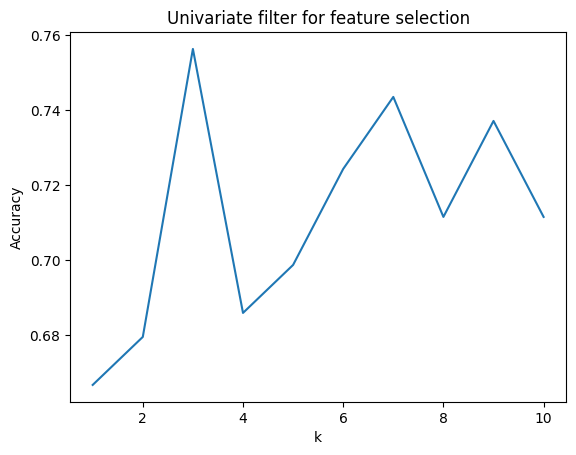

In [ ]:
# Use the filter approach for feature selection
ks = np.arange(1, 11, 1)
accs = []
clf = SVC(kernel='rbf')
kf = StratifiedKFold(n_splits=5, shuffle = True)
for k in ks:
    print('--------------- Filter feature selection, k =', k)

    cv_y_test = []
    cv_y_pred = []

    for train_index, test_index in kf.split(xFC, yFC):

       # Training phase
        x_train = xFC[train_index, :]
        y_train = yFC[train_index]

        ffs = SelectKBest(mutual_info_classif, k=k)
        ffs.fit(x_train, y_train)
        x_train = ffs.transform(x_train)

        clf.fit(x_train, y_train)

        # Test phase
        x_test = ffs.transform(xFC[test_index, :])
        y_test = yFC[test_index]
        y_pred = clf.predict(x_test)

        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)

    acc = accuracy_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred))
    rec = recall_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred), average = None)
    pre = precision_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred), average = None)

    print('ACC: ', acc, 'Recall: ', rec, 'Precision: ', pre)
    accs.append(acc)

plt.plot(ks, accs)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Univariate filter for feature selection')
plt.show()

La mejor cantidad de características para este conjunto de datos es de 8 con una exactitud de 0.6094, lo cuál no es muy bueno. Esto significa que para que el modelo sea mejor, se necesita mayor número de características.

**Clasificación de no tarea cognitiva vs tarea cognitiva**

In [ ]:
frank_cog= pd.read_csv("/Features_Frank_Cognitivo.txt" , header=None, delimiter= "\t")
frank_cog = frank_cog.dropna(axis=1)
frank_cog.head()

,0,1,2,3,4,5,6,7,8,9,...,2332,2333,2334,2335,2336,2337,2338,2339,2340,2341
0,1,1,-1.316079,-0.569181,-0.840397,-2.263029,-0.477150,-0.473358,-1.639392,-0.018691,...,-1.089592,-1.521619,-0.756561,-1.132632,-1.944529,-1.126415,-1.040056,-1.276589,-1.252492,-1.276102
1,1,1,-0.092858,-0.509809,-0.208803,0.182265,-1.280907,-0.332009,0.088508,-0.322166,...,-1.129138,-1.549519,-1.534214,-0.629425,-1.352853,-0.975112,-1.168972,-2.116018,-1.773718,-1.474069
2,1,1,-0.924355,-1.020561,-0.608800,-1.923035,-1.002875,-0.927044,-0.946278,-0.433741,...,-1.051609,-1.223329,-1.384643,-0.561653,-0.666955,-1.012405,-0.713106,-1.353017,-1.530745,-0.481837
3,1,1,-0.269049,-0.495929,-0.515496,-0.309277,-0.425367,-0.968869,-0.364516,-1.179716,...,-0.825389,-0.510917,-0.676058,-0.091499,-0.740510,-0.497735,-0.659177,-1.753575,-0.644050,-0.541565
4,1,1,0.174988,-0.915864,0.160994,-2.238067,-0.740315,-0.548436,0.227631,-0.112852,...,-0.375743,-1.633402,-1.146866,-0.800723,-0.698990,-0.311886,-1.488918,-1.371906,-1.615953,-0.688520


In [ ]:
transformacion = lambda x: 1 if 1 <= x <= 12 else 2
frank_cog[0] = frank_cog[0].map(transformacion)
xFC1 = frank_cog.iloc[:, 2:].values
yFC1 = frank_cog.iloc[:, 0].values


SVM

In [ ]:
SVM_cross_validation(xFC1,yFC1,5,"rbf",True, 1)

              precision    recall  f1-score   support

           1       0.85      0.88      0.86        32
           2       0.78      0.74      0.76        19

    accuracy                           0.82        51
   macro avg       0.81      0.81      0.81        51
weighted avg       0.82      0.82      0.82        51

              precision    recall  f1-score   support

           1       0.77      0.97      0.86        31
           2       0.92      0.55      0.69        20

    accuracy                           0.80        51
   macro avg       0.84      0.76      0.77        51
weighted avg       0.83      0.80      0.79        51

              precision    recall  f1-score   support

           1       0.76      0.90      0.82        31
           2       0.77      0.53      0.62        19

    accuracy                           0.76        50
   macro avg       0.76      0.71      0.72        50
weighted avg       0.76      0.76      0.75        50

              preci

KNN

k=13

In [ ]:
KNN_cross_validation(xFC1,yFC1,5,13,True)

              precision    recall  f1-score   support

           1       0.81      0.78      0.79        32
           2       0.65      0.68      0.67        19

    accuracy                           0.75        51
   macro avg       0.73      0.73      0.73        51
weighted avg       0.75      0.75      0.75        51

              precision    recall  f1-score   support

           1       0.69      0.81      0.75        31
           2       0.60      0.45      0.51        20

    accuracy                           0.67        51
   macro avg       0.65      0.63      0.63        51
weighted avg       0.66      0.67      0.66        51

              precision    recall  f1-score   support

           1       0.70      0.74      0.72        31
           2       0.53      0.47      0.50        19

    accuracy                           0.64        50
   macro avg       0.61      0.61      0.61        50
weighted avg       0.63      0.64      0.64        50

              preci

MLP 5 capas

In [ ]:
import warnings
warnings.filterwarnings("ignore")

perceptron(xFC1,yFC1,(5,5,5,5,5))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        32
           2       0.37      1.00      0.54        19

    accuracy                           0.37        51
   macro avg       0.19      0.50      0.27        51
weighted avg       0.14      0.37      0.20        51

              precision    recall  f1-score   support

           1       0.61      1.00      0.76        31
           2       0.00      0.00      0.00        20

    accuracy                           0.61        51
   macro avg       0.30      0.50      0.38        51
weighted avg       0.37      0.61      0.46        51

              precision    recall  f1-score   support

           1       0.77      0.65      0.70        31
           2       0.54      0.68      0.60        19

    accuracy                           0.66        50
   macro avg       0.66      0.66      0.65        50
weighted avg       0.68      0.66      0.66        50

              preci

2. Seleccione dos modelos de clasificación no vistos en clase, y evalúelos con sus conjuntos de datos. Calcule tanto la exactitud, la precisión por clase y el recall por clase para cada uno de los modelos.


Decission Tree Classifier

In [ ]:
dtc_cross_validation(xFC1,yFC1,5, True, 'gini')

              precision    recall  f1-score   support

           1       0.70      0.72      0.71        32
           2       0.50      0.47      0.49        19

    accuracy                           0.63        51
   macro avg       0.60      0.60      0.60        51
weighted avg       0.62      0.63      0.63        51

              precision    recall  f1-score   support

           1       0.79      0.74      0.77        31
           2       0.64      0.70      0.67        20

    accuracy                           0.73        51
   macro avg       0.71      0.72      0.72        51
weighted avg       0.73      0.73      0.73        51

              precision    recall  f1-score   support

           1       0.69      0.65      0.67        31
           2       0.48      0.53      0.50        19

    accuracy                           0.60        50
   macro avg       0.58      0.59      0.58        50
weighted avg       0.61      0.60      0.60        50

              preci

XGBoost Classifier

In [ ]:
XGB_cross_validation(xFC1,yFC1,5, True, 'gbtree')


              precision    recall  f1-score   support

           1       0.78      0.97      0.86        32
           2       0.91      0.53      0.67        19

    accuracy                           0.80        51
   macro avg       0.84      0.75      0.76        51
weighted avg       0.82      0.80      0.79        51

              precision    recall  f1-score   support

           1       0.85      0.94      0.89        31
           2       0.88      0.75      0.81        20

    accuracy                           0.86        51
   macro avg       0.87      0.84      0.85        51
weighted avg       0.86      0.86      0.86        51

              precision    recall  f1-score   support

           1       0.74      0.90      0.81        31
           2       0.75      0.47      0.58        19

    accuracy                           0.74        50
   macro avg       0.74      0.69      0.70        50
weighted avg       0.74      0.74      0.72        50

              preci

El mejo clasificador para este conjunto de datos es SVM base radial con una exactitud de 0.79.

Hiperparámetro XGBOOST

In [ ]:
boo = ['gbtree', 'gblinear', 'dart']

for i in boo:
  print(f"\nPara booster {i}:")
  XGB_cross_validation(xFC1,yFC1, 5, False, i)


Para booster gbtree:
Resultados del clasificador:


+--------------+--------------------+--------------------+--------------------+---------+
|    Clase     |     Precisión      |       Recall       |     Puntaje F1     | Soporte |
+--------------+--------------------+--------------------+--------------------+---------+
|      1       | 0.8242424242424242 | 0.8717948717948718 | 0.8473520249221185 |   156   |
|      2       | 0.7701149425287356 | 0.6979166666666666 | 0.7322404371584699 |    96   |
|  macro avg   | 0.7971786833855798 | 0.7848557692307692 | 0.7897962310402942 |   252   |
| weighted avg | 0.803622431208638  | 0.8055555555555556 | 0.8034999914883475 |   252   |
+--------------+--------------------+--------------------+--------------------+---------+

Accuracy =  0.8055555555555556

Para booster gblinear:
Resultados del clasificador:


+--------------+--------------------+--------------------+--------------------+---------+
|    Clase     |     Precisión      |       Recall

El mejor hiperparámetro de booster para el XGBoost classifier es 'gbtree' con una exactitud de 0.825.

4. Para uno de los modelos de clasificación, aplique un método de selección de características. Indique cuantas características son suficientes para obtener buenos resultados.

--------------- Filter feature selection, k = 1
ACC:  0.7023809523809523 Recall:  [0.88461538 0.40625   ] Precision:  [0.70769231 0.68421053]
--------------- Filter feature selection, k = 2
ACC:  0.746031746031746 Recall:  [0.85897436 0.5625    ] Precision:  [0.76136364 0.71052632]
--------------- Filter feature selection, k = 3
ACC:  0.7420634920634921 Recall:  [0.87179487 0.53125   ] Precision:  [0.75138122 0.71830986]
--------------- Filter feature selection, k = 4
ACC:  0.753968253968254 Recall:  [0.87179487 0.5625    ] Precision:  [0.76404494 0.72972973]
--------------- Filter feature selection, k = 5
ACC:  0.7619047619047619 Recall:  [0.87179487 0.58333333] Precision:  [0.77272727 0.73684211]
--------------- Filter feature selection, k = 6
ACC:  0.7579365079365079 Recall:  [0.86538462 0.58333333] Precision:  [0.77142857 0.72727273]
--------------- Filter feature selection, k = 7
ACC:  0.7658730158730159 Recall:  [0.88461538 0.57291667] Precision:  [0.77094972 0.75342466]
--------

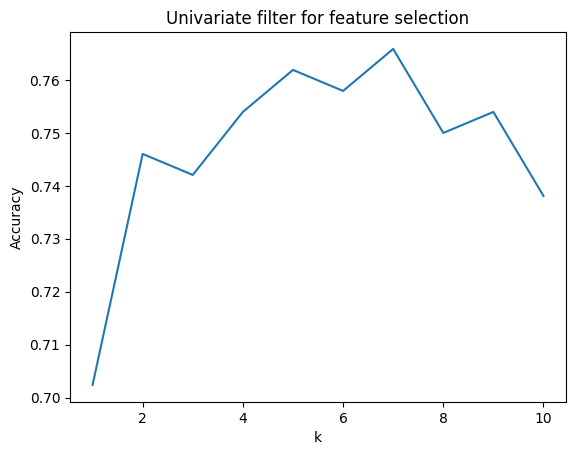

In [ ]:
# Use the filter approach for feature selection
ks = np.arange(1, 11, 1)
accs = []
clf = SVC(kernel='rbf')
kf = StratifiedKFold(n_splits=5, shuffle = True)
for k in ks:
    print('--------------- Filter feature selection, k =', k)

    cv_y_test = []
    cv_y_pred = []

    for train_index, test_index in kf.split(xFC1, yFC1):

       # Training phase
        x_train = xFC1[train_index, :]
        y_train = yFC1[train_index]

        ffs = SelectKBest(mutual_info_classif, k=k)
        ffs.fit(x_train, y_train)
        x_train = ffs.transform(x_train)

        clf.fit(x_train, y_train)

        # Test phase
        x_test = ffs.transform(xFC1[test_index, :])
        y_test = yFC1[test_index]
        y_pred = clf.predict(x_test)

        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)

    acc = accuracy_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred))
    rec = recall_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred), average = None)
    pre = precision_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred), average = None)

    print('ACC: ', acc, 'Recall: ', rec, 'Precision: ', pre)
    accs.append(acc)

plt.plot(ks, accs)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Univariate filter for feature selection')
plt.show()

El número óptimo de características para este conjunto de datos es 7 ya que las dos tienen una exactitud de 0.76587, con unas métricas por clase arriba de 0.75.

### Cognitivo Laura

**Clasificación de tareas**

In [ ]:
laura_cog= pd.read_csv("/content/drive/Shareddrives/Proyecto_AprendizajeAI/Features_Laura_Cognitivo.txt" , header=None, delimiter= "\t")
laura_cog = laura_cog.dropna(axis=1)
laura_cog = laura_cog[laura_cog[1] != 0]
laura_cog = laura_cog[laura_cog[0] != 13]
laura_cog.head()

,0,1,2,3,4,5,6,7,8,9,...,2332,2333,2334,2335,2336,2337,2338,2339,2340,2341
0,1,1,0.017339,-0.636327,-2.293761,-1.049895,-0.815500,-0.607317,0.276530,-1.970846,...,-0.833860,-1.579618,-1.023245,-0.813402,-0.841095,-0.833210,-0.891639,-1.369041,-1.703913,-0.270019
1,1,1,-0.464403,-0.088847,-1.380865,-1.597218,-1.485126,-2.568367,-0.543693,-0.922254,...,-0.945614,-1.556861,-1.537365,-1.195360,-0.920358,-1.276328,-0.559226,-1.294663,-1.690584,-1.553823
2,1,1,0.387756,0.025880,0.112102,-0.957592,-0.906744,-1.344665,-0.102744,0.714924,...,-1.235127,-1.107091,-1.287671,-1.123152,-1.291325,-1.523272,-1.326378,-1.247965,-0.712618,-0.967449
3,1,1,-0.631094,-0.471242,-0.084936,-0.789807,-1.429423,-1.741191,-0.529927,-0.436456,...,-0.588948,-1.787488,-0.811567,-0.904608,-0.565347,-1.011173,-1.171311,-1.814192,-0.892988,-1.070001
4,1,1,-0.524811,-0.941667,-2.081175,-1.482091,-1.679116,-2.010238,-1.417845,-1.085229,...,-0.781886,-1.537562,-0.668185,-0.815963,-0.636921,-0.381253,-0.886230,-1.230972,-0.395736,-0.844716


In [ ]:
transformacion = lambda x: 1 if 1 <= x <= 4 else 2 if 5 <= x <= 8 else 3 if 9 <= x <= 12 else 4
laura_cog[0] = laura_cog[0].map(transformacion)
xLC = laura_cog.iloc[:, 2:].values
yLC = laura_cog.iloc[:, 0].values

1. Evalúe el rendimiento de los modelos de clasificación SVM, K-NN, y MLP (de al menos 2 capas). Calcule tanto la exactitud, la precisión por clase y el recall por clase para cada uno de los modelos.

SVM

In [ ]:
SVM_cross_validation(xLC,yLC,5,"rbf",True, 1)

              precision    recall  f1-score   support

           1       0.89      0.73      0.80        11
           2       0.83      1.00      0.91        10
           3       0.91      0.91      0.91        11

    accuracy                           0.88        32
   macro avg       0.88      0.88      0.87        32
weighted avg       0.88      0.88      0.87        32

              precision    recall  f1-score   support

           1       1.00      0.82      0.90        11
           2       1.00      1.00      1.00        10
           3       0.83      1.00      0.91        10

    accuracy                           0.94        31
   macro avg       0.94      0.94      0.94        31
weighted avg       0.95      0.94      0.94        31

              precision    recall  f1-score   support

           1       0.90      0.90      0.90        10
           2       1.00      0.91      0.95        11
           3       0.91      1.00      0.95        10

    accuracy        

KNN

k=13

In [ ]:
KNN_cross_validation(xLC,yLC,5,13,True)

              precision    recall  f1-score   support

           1       1.00      0.27      0.43        11
           2       0.82      0.90      0.86        10
           3       0.61      1.00      0.76        11

    accuracy                           0.72        32
   macro avg       0.81      0.72      0.68        32
weighted avg       0.81      0.72      0.68        32

              precision    recall  f1-score   support

           1       1.00      0.91      0.95        11
           2       1.00      0.90      0.95        10
           3       0.83      1.00      0.91        10

    accuracy                           0.94        31
   macro avg       0.94      0.94      0.94        31
weighted avg       0.95      0.94      0.94        31

              precision    recall  f1-score   support

           1       0.86      0.60      0.71        10
           2       1.00      1.00      1.00        11
           3       0.69      0.90      0.78        10

    accuracy        

MLP 5 capas

In [ ]:
import warnings
warnings.filterwarnings("ignore")

perceptron(xLC,yLC,(5,5,5,5,5))

              precision    recall  f1-score   support

           1       0.90      0.82      0.86        11
           2       0.45      1.00      0.62        10
           3       0.00      0.00      0.00        11

    accuracy                           0.59        32
   macro avg       0.45      0.61      0.49        32
weighted avg       0.45      0.59      0.49        32

              precision    recall  f1-score   support

           1       1.00      0.73      0.84        11
           2       0.00      0.00      0.00        10
           3       0.43      0.90      0.58        10

    accuracy                           0.55        31
   macro avg       0.48      0.54      0.47        31
weighted avg       0.49      0.55      0.49        31

              precision    recall  f1-score   support

           1       1.00      0.10      0.18        10
           2       1.00      1.00      1.00        11
           3       0.53      1.00      0.69        10

    accuracy        

2. Seleccione dos modelos de clasificación no vistos en clase, y evalúelos con sus conjuntos de datos. Calcule tanto la exactitud, la precisión por clase y el recall por clase para cada uno de los modelos.

Decision Tree Classifier

In [ ]:
dtc_cross_validation(xLC,yLC,5, True, 'gini')

              precision    recall  f1-score   support

           1       0.80      0.73      0.76        11
           2       0.86      0.60      0.71        10
           3       0.60      0.82      0.69        11

    accuracy                           0.72        32
   macro avg       0.75      0.72      0.72        32
weighted avg       0.75      0.72      0.72        32

              precision    recall  f1-score   support

           1       0.86      0.55      0.67        11
           2       1.00      1.00      1.00        10
           3       0.64      0.90      0.75        10

    accuracy                           0.81        31
   macro avg       0.83      0.82      0.81        31
weighted avg       0.83      0.81      0.80        31

              precision    recall  f1-score   support

           1       0.55      0.60      0.57        10
           2       0.88      0.64      0.74        11
           3       0.75      0.90      0.82        10

    accuracy        

XGBoost Classifier

In [ ]:
XGB_cross_validation(xLC,yLC,5, True, 'gbtree')

              precision    recall  f1-score   support

           1       0.90      0.82      0.86        11
           2       0.75      0.90      0.82        10
           3       0.90      0.82      0.86        11

    accuracy                           0.84        32
   macro avg       0.85      0.85      0.84        32
weighted avg       0.85      0.84      0.84        32

              precision    recall  f1-score   support

           1       1.00      0.64      0.78        11
           2       0.91      1.00      0.95        10
           3       0.77      1.00      0.87        10

    accuracy                           0.87        31
   macro avg       0.89      0.88      0.87        31
weighted avg       0.90      0.87      0.86        31

              precision    recall  f1-score   support

           1       0.82      0.90      0.86        10
           2       1.00      1.00      1.00        11
           3       0.89      0.80      0.84        10

    accuracy        

El mejor clasificador para este caso es XGBOOST

3. Indique qué modelos de clasificación de los que evaluó anteriormente tienen hiperparámetros y cuáles son éstos en cada caso. Seleccione uno de estos clasificadores, y determine sus hiperparámetros óptimos.

1.   ***SVM***
  *   **C**: Es el parámetro que controla la relación el tamaño del margen (valor grande de 𝐶 ocasiona un margen pequeño, y un valor grande de 𝐶 conduce a un margen grande).
2.   ***KNN***
  *   **k**: Representa el número de vecinos más cercanos que se utilizan para la clasificación. Seleccionar un valor adecuado para k es importante, ya que un valor bajo puede llevar a un modelo demasiado sensible al ruido y un valor alto puede llevar a un modelo demasiado generalizado.
3.   ***MLP***
  *   **hidden_layer_sizes**: Especifica la arquitectura de la red neuronal, es decir, el número de neuronas en cada capa oculta.
4.   ***Decision Tree Classifier***
  *   **max_depth**: Determina la profundidad máxima del árbol de decisión.
  *   **criterion**: Es el encargado de medir la uniformidad de los nodos, uniformidad quiere decir que las cosas que son similares deben estar juntas y las que son diferentes deben separarse y distinguirse claramente unas de otras. se puede elegir el mse/mae/friedman_mse para regresión y gini/entropy para clasificación.
  *   **min_samples_split**: el número mínimo de datos requeridos por un nodo para realizar una división.
5.   ***XGBoost Classifier***
  *   **n_estimators**: Representa el número de árboles que se utilizarán en el modelo. Cuanto mayor sea este valor, más complejo será el modelo y más tiempo requerirá el entrenamiento. Sin embargo, un número demasiado alto puede llevar a un sobreajuste.
  *   **booster**: El tipo de modelo de clasificación usado, por defecto gbtree.
  *   **max_depth**: “Profundidad” o número de nodos de bifurcación de los árboles de decisión usados en el entrenamiento.

Hiperparámetro KNN

In [ ]:
for k in range(10, 20):
  print(f'\nPara k = {k} los resultados son: ')
  KNN_cross_validation(xLC,yLC,5,k,False)


Para k = 10 los resultados son: 
Resultados del clasificador:


+--------------+--------------------+--------------------+--------------------+---------+
|    Clase     |     Precisión      |       Recall       |     Puntaje F1     | Soporte |
+--------------+--------------------+--------------------+--------------------+---------+
|      1       | 0.9473684210526315 | 0.6923076923076923 | 0.7999999999999999 |    52   |
|      2       | 0.8909090909090909 | 0.9423076923076923 | 0.9158878504672897 |    52   |
|      3       | 0.7936507936507936 | 0.9615384615384616 | 0.8695652173913043 |    52   |
|  macro avg   | 0.877309435204172  | 0.8653846153846154 | 0.8618176892861981 |   156   |
| weighted avg | 0.8773094352041719 | 0.8653846153846154 | 0.861817689286198  |   156   |
+--------------+--------------------+--------------------+--------------------+---------+

Accuracy =  0.8653846153846154

Para k = 11 los resultados son: 
Resultados del clasificador:


+--------------+------------

EL mejor valor de k, que es el hiperparámetro de KNN, es de 17, con una exactitud de 0.747.

4. Para uno de los modelos de clasificación, aplique un método de selección de características. Indique cuantas características son suficientes para obtener buenos resultados.

--------------- Filter feature selection, k = 1
ACC:  0.6474358974358975 Recall:  [0.48076923 0.84615385 0.61538462] Precision:  [0.5        0.74576271 0.68085106]
--------------- Filter feature selection, k = 2
ACC:  0.6538461538461539 Recall:  [0.5        0.80769231 0.65384615] Precision:  [0.54166667 0.77777778 0.62962963]
--------------- Filter feature selection, k = 3
ACC:  0.6602564102564102 Recall:  [0.55769231 0.80769231 0.61538462] Precision:  [0.50877193 0.77777778 0.71111111]
--------------- Filter feature selection, k = 4
ACC:  0.6923076923076923 Recall:  [0.55769231 0.84615385 0.67307692] Precision:  [0.55769231 0.81481481 0.7       ]
--------------- Filter feature selection, k = 5
ACC:  0.6858974358974359 Recall:  [0.55769231 0.80769231 0.69230769] Precision:  [0.53703704 0.82352941 0.70588235]
--------------- Filter feature selection, k = 6
ACC:  0.7564102564102564 Recall:  [0.55769231 0.90384615 0.80769231] Precision:  [0.69047619 0.85454545 0.71186441]
--------------- 

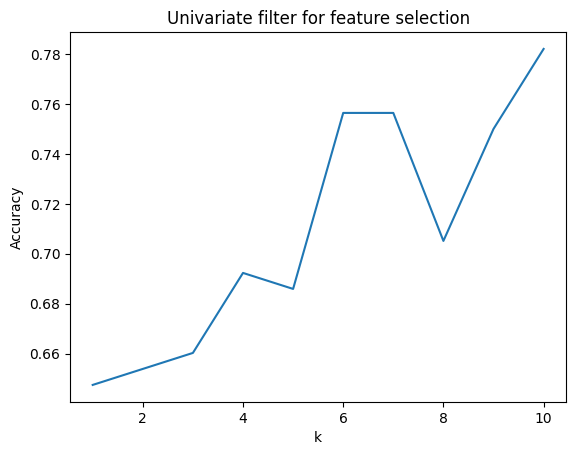

In [ ]:
# Use the filter approach for feature selection
ks = np.arange(1, 11, 1)
accs = []
clf = SVC(kernel='rbf')
kf = StratifiedKFold(n_splits=5, shuffle = True)
for k in ks:
    print('--------------- Filter feature selection, k =', k)

    cv_y_test = []
    cv_y_pred = []

    for train_index, test_index in kf.split(xLC, yLC):

       # Training phase
        x_train = xLC[train_index, :]
        y_train = yLC[train_index]

        ffs = SelectKBest(mutual_info_classif, k=k)
        ffs.fit(x_train, y_train)
        x_train = ffs.transform(x_train)

        clf.fit(x_train, y_train)

        # Test phase
        x_test = ffs.transform(xLC[test_index, :])
        y_test = yLC[test_index]
        y_pred = clf.predict(x_test)

        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)

    acc = accuracy_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred))
    rec = recall_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred), average = None)
    pre = precision_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred), average = None)

    print('ACC: ', acc, 'Recall: ', rec, 'Precision: ', pre)
    accs.append(acc)

plt.plot(ks, accs)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Univariate filter for feature selection')
plt.show()

La mejor cantidad de características para este conjunto de datos utilizando el método de filtrado es de 9, con una exactitud de 0.5494. Es un modelo que no se puede aceptar porque es muy bajo su exactitud, por lo que se necesitarían mayor número de características.

**Clasificación de no tarea cognitiva vs tarea cognitiva**

In [ ]:
laura_cog= pd.read_csv("/Features_Laura_Cognitivo.txt" , header=None, delimiter= "\t")
laura_cog = laura_cog.dropna(axis=1)
laura_cog.head()

,0,1,2,3,4,5,6,7,8,9,...,2332,2333,2334,2335,2336,2337,2338,2339,2340,2341
0,1,1,0.017339,-0.636327,-2.293761,-1.049895,-0.815500,-0.607317,0.276530,-1.970846,...,-0.833860,-1.579618,-1.023245,-0.813402,-0.841095,-0.833210,-0.891639,-1.369041,-1.703913,-0.270019
1,1,1,-0.464403,-0.088847,-1.380865,-1.597218,-1.485126,-2.568367,-0.543693,-0.922254,...,-0.945614,-1.556861,-1.537365,-1.195360,-0.920358,-1.276328,-0.559226,-1.294663,-1.690584,-1.553823
2,1,1,0.387756,0.025880,0.112102,-0.957592,-0.906744,-1.344665,-0.102744,0.714924,...,-1.235127,-1.107091,-1.287671,-1.123152,-1.291325,-1.523272,-1.326378,-1.247965,-0.712618,-0.967449
3,1,1,-0.631094,-0.471242,-0.084936,-0.789807,-1.429423,-1.741191,-0.529927,-0.436456,...,-0.588948,-1.787488,-0.811567,-0.904608,-0.565347,-1.011173,-1.171311,-1.814192,-0.892988,-1.070001
4,1,1,-0.524811,-0.941667,-2.081175,-1.482091,-1.679116,-2.010238,-1.417845,-1.085229,...,-0.781886,-1.537562,-0.668185,-0.815963,-0.636921,-0.381253,-0.886230,-1.230972,-0.395736,-0.844716


In [ ]:
transformacion = lambda x: 1 if 1 <= x <= 12 else 2
laura_cog[0] = laura_cog[0].map(transformacion)
xLC1 = laura_cog.iloc[:, 2:].values
yLC1 = laura_cog.iloc[:, 0].values

SVM

In [ ]:
SVM_cross_validation(xLC1,yLC1,5,"rbf",True, 1)

              precision    recall  f1-score   support

           1       0.83      0.94      0.88        32
           2       0.87      0.68      0.76        19

    accuracy                           0.84        51
   macro avg       0.85      0.81      0.82        51
weighted avg       0.85      0.84      0.84        51

              precision    recall  f1-score   support

           1       0.83      0.94      0.88        31
           2       0.88      0.70      0.78        20

    accuracy                           0.84        51
   macro avg       0.85      0.82      0.83        51
weighted avg       0.85      0.84      0.84        51

              precision    recall  f1-score   support

           1       0.82      0.90      0.86        31
           2       0.82      0.70      0.76        20

    accuracy                           0.82        51
   macro avg       0.82      0.80      0.81        51
weighted avg       0.82      0.82      0.82        51

              preci

KNN

k=13

In [ ]:
KNN_cross_validation(xLC1,yLC1,5,13,True)

              precision    recall  f1-score   support

           1       0.81      0.94      0.87        32
           2       0.86      0.63      0.73        19

    accuracy                           0.82        51
   macro avg       0.83      0.78      0.80        51
weighted avg       0.83      0.82      0.82        51

              precision    recall  f1-score   support

           1       0.71      0.71      0.71        31
           2       0.55      0.55      0.55        20

    accuracy                           0.65        51
   macro avg       0.63      0.63      0.63        51
weighted avg       0.65      0.65      0.65        51

              precision    recall  f1-score   support

           1       0.76      0.84      0.80        31
           2       0.71      0.60      0.65        20

    accuracy                           0.75        51
   macro avg       0.74      0.72      0.72        51
weighted avg       0.74      0.75      0.74        51

              preci

MLP 5 capas

In [ ]:
perceptron(xLC1,yLC1,(5,5,5,5,5))

              precision    recall  f1-score   support

           1       0.64      0.88      0.74        32
           2       0.43      0.16      0.23        19

    accuracy                           0.61        51
   macro avg       0.53      0.52      0.48        51
weighted avg       0.56      0.61      0.55        51

              precision    recall  f1-score   support

           1       0.72      1.00      0.84        31
           2       1.00      0.40      0.57        20

    accuracy                           0.76        51
   macro avg       0.86      0.70      0.70        51
weighted avg       0.83      0.76      0.73        51

              precision    recall  f1-score   support

           1       0.77      0.65      0.70        31
           2       0.56      0.70      0.62        20

    accuracy                           0.67        51
   macro avg       0.66      0.67      0.66        51
weighted avg       0.69      0.67      0.67        51

              preci

2. Seleccione dos modelos de clasificación no vistos en clase, y evalúelos con sus conjuntos de datos. Calcule tanto la exactitud, la precisión por clase y el recall por clase para cada uno de los modelos.


Decission Tree Classifier

In [ ]:
dtc_cross_validation(xLC1,yLC1,5, True, 'gini')

              precision    recall  f1-score   support

           1       0.79      0.81      0.80        32
           2       0.67      0.63      0.65        19

    accuracy                           0.75        51
   macro avg       0.73      0.72      0.72        51
weighted avg       0.74      0.75      0.74        51

              precision    recall  f1-score   support

           1       0.70      0.68      0.69        31
           2       0.52      0.55      0.54        20

    accuracy                           0.63        51
   macro avg       0.61      0.61      0.61        51
weighted avg       0.63      0.63      0.63        51

              precision    recall  f1-score   support

           1       0.67      0.58      0.62        31
           2       0.46      0.55      0.50        20

    accuracy                           0.57        51
   macro avg       0.56      0.57      0.56        51
weighted avg       0.58      0.57      0.57        51

              preci

XGBoost Classifier

In [ ]:
XGB_cross_validation(xLC1,yLC1,5, True, 'gbtree')

              precision    recall  f1-score   support

           1       0.87      0.81      0.84        32
           2       0.71      0.79      0.75        19

    accuracy                           0.80        51
   macro avg       0.79      0.80      0.79        51
weighted avg       0.81      0.80      0.81        51

              precision    recall  f1-score   support

           1       0.74      0.81      0.77        31
           2       0.65      0.55      0.59        20

    accuracy                           0.71        51
   macro avg       0.69      0.68      0.68        51
weighted avg       0.70      0.71      0.70        51

              precision    recall  f1-score   support

           1       0.74      0.90      0.81        31
           2       0.77      0.50      0.61        20

    accuracy                           0.75        51
   macro avg       0.75      0.70      0.71        51
weighted avg       0.75      0.75      0.73        51

              preci

El mejor modelo para estos datos, como en todos los casos anteriores es el SVM de base radial con una exactitud de 0.81.

Hiperparámetro KNN

In [ ]:
for k in range(10, 20):
  print(f'\nPara k = {k} los resultados son: ')
  KNN_cross_validation(xLC1,yLC1,5,k,False)


Para k = 10 los resultados son: 
Resultados del clasificador:


+--------------+--------------------+--------------------+--------------------+---------+
|    Clase     |     Precisión      |       Recall       |     Puntaje F1     | Soporte |
+--------------+--------------------+--------------------+--------------------+---------+
|      1       |        0.75        | 0.9038461538461539 | 0.8197674418604652 |   156   |
|      2       | 0.7692307692307693 | 0.5154639175257731 | 0.617283950617284  |    97   |
|  macro avg   | 0.7596153846153846 | 0.7096550356859634 | 0.7185256962388746 |   253   |
| weighted avg | 0.7573730617208878 | 0.7549407114624506 | 0.7421354313838306 |   253   |
+--------------+--------------------+--------------------+--------------------+---------+

Accuracy =  0.7549407114624506

Para k = 11 los resultados son: 
Resultados del clasificador:


+--------------+--------------------+--------------------+--------------------+---------+
|    Clase     |     Precisi

EL mejor valor de k, que es el hiperparámetro de KNN, es de 17, con una exactitud de 0.7826.

4. Para uno de los modelos de clasificación, aplique un método de selección de características. Indique cuantas características son suficientes para obtener buenos resultados.

--------------- Filter feature selection, k = 1
ACC:  0.6324110671936759 Recall:  [0.85897436 0.26804124] Precision:  [0.65365854 0.54166667]
--------------- Filter feature selection, k = 2
ACC:  0.6837944664031621 Recall:  [0.83974359 0.43298969] Precision:  [0.70430108 0.62686567]
--------------- Filter feature selection, k = 3
ACC:  0.7193675889328063 Recall:  [0.83974359 0.5257732 ] Precision:  [0.74011299 0.67105263]
--------------- Filter feature selection, k = 4
ACC:  0.7391304347826086 Recall:  [0.90384615 0.4742268 ] Precision:  [0.734375   0.75409836]
--------------- Filter feature selection, k = 5
ACC:  0.6877470355731226 Recall:  [0.83974359 0.44329897] Precision:  [0.70810811 0.63235294]
--------------- Filter feature selection, k = 6
ACC:  0.7193675889328063 Recall:  [0.84615385 0.51546392] Precision:  [0.73743017 0.67567568]
--------------- Filter feature selection, k = 7
ACC:  0.758893280632411 Recall:  [0.86538462 0.58762887] Precision:  [0.77142857 0.73076923]
-------

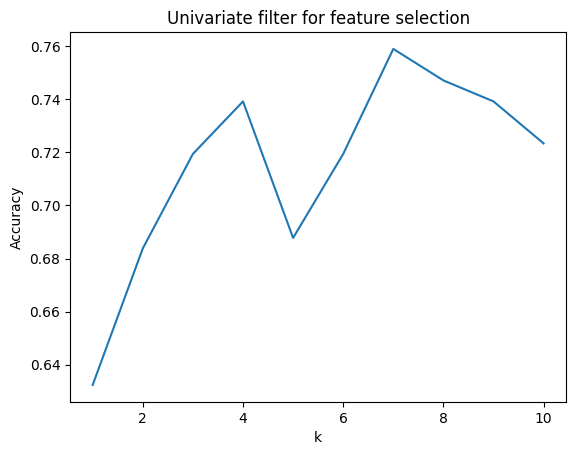

In [ ]:
# Use the filter approach for feature selection
ks = np.arange(1, 11, 1)
accs = []
clf = SVC(kernel='rbf')
kf = StratifiedKFold(n_splits=5, shuffle = True)
for k in ks:
    print('--------------- Filter feature selection, k =', k)

    cv_y_test = []
    cv_y_pred = []

    for train_index, test_index in kf.split(xLC1, yLC1):

       # Training phase
        x_train = xLC1[train_index, :]
        y_train = yLC1[train_index]

        ffs = SelectKBest(mutual_info_classif, k=k)
        ffs.fit(x_train, y_train)
        x_train = ffs.transform(x_train)

        clf.fit(x_train, y_train)

        # Test phase
        x_test = ffs.transform(xLC1[test_index, :])
        y_test = yLC1[test_index]
        y_pred = clf.predict(x_test)

        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)

    acc = accuracy_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred))
    rec = recall_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred), average = None)
    pre = precision_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred), average = None)

    print('ACC: ', acc, 'Recall: ', rec, 'Precision: ', pre)
    accs.append(acc)

plt.plot(ks, accs)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Univariate filter for feature selection')
plt.show()

La óptima cantidad de características para este conjunto de datos utilizando el método de filtrado es k = 10, con una exactitud de 0.791.

## Aprendizaje por transferencia

Datos de entrenamiento: Laura

Datos de prueba: Francisco

In [ ]:
lauraP300 = lauraP300.drop([154,153,152], axis=1)
xL = lauraP300.iloc[:, 1:].values
yL = lauraP300.iloc[:, 0].values


xF = frankP300.iloc[:, 1:].values
yF = frankP300.iloc[:, 0].values

SVM

In [ ]:
# Datos de entrenamiento: Laura
X_train = xL
y_train = yL

# Datos de prueba: francisco
X_test = xF
y_test = yF

# Creación del modelo SVM radial
model = SVC(kernel='rbf')

# Entrenamiento del modelo
model.fit(X_train, y_train)

# Prueba del modelo
y_pred = model.predict(X_test)

# Resultados del clasificador

report =  classification_report(y_test, y_pred, output_dict=True)
accuracy = report['accuracy']
table = PrettyTable()
table.field_names = ['Clase', 'Precisión', 'Recall', 'Puntaje F1', 'Soporte']

# Agrega las filas a la tabla
for class_label, metrics in report.items():
    if class_label != 'accuracy':
        precision = metrics['precision']
        recall = metrics['recall']
        f1_score = metrics['f1-score']
        support = metrics['support']
        table.add_row([class_label, precision, recall, f1_score, support])

# Imprime el resultado
print(table)
print("\nPrecisión del modelo SVM:", accuracy)


+--------------+---------------------+---------------------+---------------------+---------+
|    Clase     |      Precisión      |        Recall       |      Puntaje F1     | Soporte |
+--------------+---------------------+---------------------+---------------------+---------+
|      1       | 0.34831460674157305 | 0.11191335740072202 | 0.16939890710382513 |   277   |
|      2       |  0.8113496932515337 |  0.9480286738351255 |  0.8743801652892562 |   1116  |
|  macro avg   |  0.5798321499965534 |  0.5299710156179237 |  0.5218895361965407 |   1393  |
| weighted avg |  0.7192745181163872 |  0.7817659727207465 |  0.7341936552265395 |   1393  |
+--------------+---------------------+---------------------+---------------------+---------+

Precisión del modelo SVM: 0.7817659727207465


MLP

In [ ]:
X_train = xL
y_train = yL

X_test = xF
y_test = yF

# Paso 5: Creación del modelo MLP
model = MLPClassifier()

# Paso 6: Entrenamiento del modelo
model.fit(X_train, y_train)

# Paso 7: Prueba del modelo
y_pred = model.predict(X_test)

# Resultados del clasificador

report =  classification_report(y_test, y_pred, output_dict=True)
accuracy = report['accuracy']
table = PrettyTable()
table.field_names = ['Clase', 'Precisión', 'Recall', 'Puntaje F1', 'Soporte']

# Agrega las filas a la tabla
for class_label, metrics in report.items():
    if class_label != 'accuracy':
        precision = metrics['precision']
        recall = metrics['recall']
        f1_score = metrics['f1-score']
        support = metrics['support']
        table.add_row([class_label, precision, recall, f1_score, support])

# Imprime el resultado
print(table)
print("\nPrecisión del modelo MLP:", accuracy)

+--------------+--------------------+---------------------+--------------------+---------+
|    Clase     |     Precisión      |        Recall       |     Puntaje F1     | Soporte |
+--------------+--------------------+---------------------+--------------------+---------+
|      1       |      0.28125       | 0.22743682310469315 | 0.251497005988024  |   277   |
|      2       | 0.8169375534644996 |  0.8557347670250897 | 0.8358862144420132 |   1116  |
|  macro avg   | 0.5490937767322498 |  0.5415857950648915 | 0.5436916102150186 |   1393  |
| weighted avg | 0.7104153335724204 |  0.7307968413496052 | 0.7196796022799493 |   1393  |
+--------------+--------------------+---------------------+--------------------+---------+

Precisión del modelo MLP: 0.7307968413496052


XGBOOST

In [ ]:
X_train = xL
y_train = yL - 1

X_test = xF
y_test = yF

# Paso 5: Creación del modelo MLP
model = XGBClassifier()

# Paso 6: Entrenamiento del modelo
model.fit(X_train, y_train)

# Paso 7: Prueba del modelo
y_pred = model.predict(X_test) + 1

# Resultados del clasificador

report =  classification_report(y_test, y_pred, output_dict=True)
accuracy = report['accuracy']
table = PrettyTable()
table.field_names = ['Clase', 'Precisión', 'Recall', 'Puntaje F1', 'Soporte']

# Agrega las filas a la tabla
for class_label, metrics in report.items():
    if class_label != 'accuracy':
        precision = metrics['precision']
        recall = metrics['recall']
        f1_score = metrics['f1-score']
        support = metrics['support']
        table.add_row([class_label, precision, recall, f1_score, support])

# Imprime el resultado
print(table)
print("\nPrecisión del modelo XGBOOST:", accuracy)

+--------------+--------------------+---------------------+---------------------+---------+
|    Clase     |     Precisión      |        Recall       |      Puntaje F1     | Soporte |
+--------------+--------------------+---------------------+---------------------+---------+
|      1       | 0.3732394366197183 | 0.19133574007220217 | 0.25298329355608595 |   277   |
|      2       | 0.820943245403677  |  0.9202508960573477 |  0.8677651035065482 |   1116  |
|  macro avg   | 0.5970913410116977 |  0.5557933180647749 |  0.5603741985313171 |   1393  |
| weighted avg | 0.7319167163059336 |  0.7753050969131371 |  0.7455148799916321 |   1393  |
+--------------+--------------------+---------------------+---------------------+---------+

Precisión del modelo XGBOOST: 0.7753050969131371


¿Es posible entrenar un modelo de clasificación con los datos de un sujeto y obtener buenos resultados con los datos de otro sujeto? ¿Por qué?



Sí es posible entrenar un modelo de clasficación con los datos de un sujeto y probarlo con otro y obtener un buen resultado. En este caso el SVM Radial fue el mejor modelo con un accuracy de 0.78 que en la vida real es un muy buen valor para un modelo de clasificación. Además este modelo tiene un precisión y recall por la clase 2 muy buena. Esto es porque la cantidad de los datos que hay, muchos son observaciones de la clase dos y muy pocos de la clase 1. Eso nos dice que tenemos un desbalance en nuestro modelo, pero aun así se alcanza a obtener un buen clasificador.

¿Consideras que debes hacer ajustes cuando tengas datos de otro sujeto?

Si se tienen datos de otro sujeto se puede volver a entrenar con ambos datos y probar con los del sujeto restante, esto podría mejorar nuestro clasificador porque ya no solo se toma en cuenta los datos de un sujeto para entrenar el modelo, en su lugar se usan 2, lo que aportaría información valiosa al momento de entrenar el modelo.